In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
unemployment_csv = '../Data/Unemployment.csv'
df = pd.read_csv(unemployment_csv)
df.head()

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,...,3.5,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1
1,2004-02-01,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,...,3.5,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0
2,2004-03-01,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,...,3.5,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9
3,2004-04-01,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,...,3.5,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9
4,2004-05-01,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,...,3.6,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8


In [4]:
state_abbreviations = {"Alabama": "AL",
                       "Alaska": "AK",
                       "Arizona": "AZ",
                       "Arkansas": "AR",
                       "California": "CA",
                       "Colorado":"CO",
                       "Connecticut": "CT",
                       "Delaware": "DE",
                       "District of Columbia": "DC",
                       "Florida": "FL",
                       "Georgia": "GA",
                       "Hawaii": "HI",
                       "Idaho": "ID",
                       "Illinois": "IL", 
                       "Indiana": "IN",
                       "Iowa": "IA",
                       "Kansas": "KS",
                       "Kentucky": "KY",
                       "Louisiana": "LA",
                       "Maine": "ME",
                       "Maryland": "MD",
                       "Massachusetts":"MA",
                       "Michigan": "MI",
                       "Minnesota": "MN",
                       "Mississippi": "MS",
                       "Missouri": "MO",
                       "Montana": "MT",
                       "Nebraska": "NE",
                       "Nevada": "NV",
                       "New Hampshire": "NH",
                       "New Jersey": "NJ",
                       "New Mexico": "NM", 
                       "New York": "NY",
                       "North Carolina": "NC",
                       "North Dakota": "ND",
                       "Ohio": "OH",
                       "Oklahoma": "OK",
                       "Oregon": "OR",
                       "Pennsylvania": "PA",
                       "Rhode Island": "RI",
                       "South Carolina": "SC",
                       "South Dakota": "SD",
                       "Tennessee": "TN",
                       "Texas": "TX",
                       "Utah": "UT",
                       "Vermont": "VT",
                       "Virginia": "VA",
                       "Washington": "WA",
                       "West Virginia": "WV",
                       "Wisconsin": "WI",
                       "Wyoming": "WY",
         }

In [5]:
df['Year'] = df['Date'].str.split('-', expand=True)[0]
df.drop(columns=['Date'], inplace= True)
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,4.0,...,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1,2004
1,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,4.0,...,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0,2004
2,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,3.9,...,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9,2004
3,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,3.9,...,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9,2004
4,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,3.9,...,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8,2004


In [6]:
# Averaging the data
avg_year_grp = df.groupby('Year').mean()

# Getting the median of all the data
med_year_grp = df.groupby('Year').median()

In [7]:
# Creating the "Average" column in the avg_year_grp
avg_year_grp['Average'] = avg_year_grp.mean(axis=1)

# Creating the "Median" column in the med_year_grp
med_year_grp['Median'] = med_year_grp.median(axis=1)

# Saving the data to csv files
avg_year_grp.to_csv('Data/Average_Unemployment_Rates_per_Year.csv')
med_year_grp.to_csv('Data/Median_Unemployment_Rates_per_Year.csv')

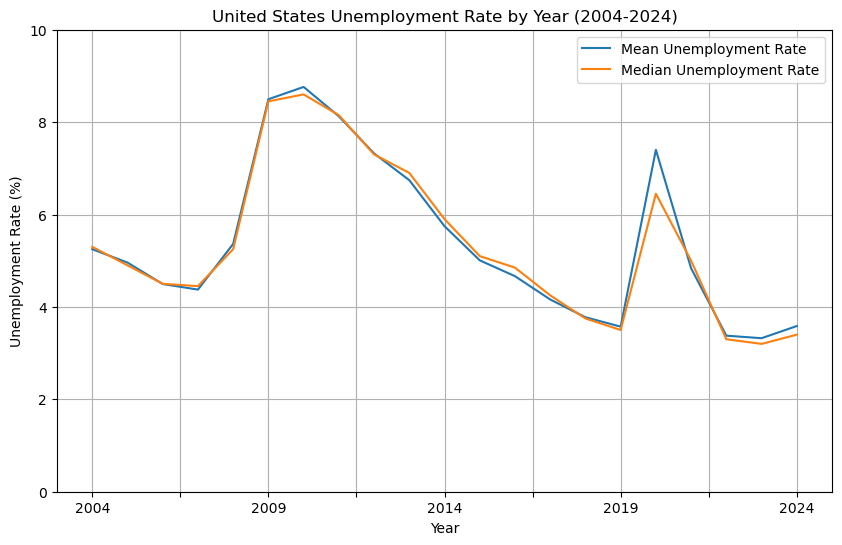

In [9]:
# Plotting the average and the median unemployment rate
overall_unemployed = pd.DataFrame({'Mean Unemployment Rate': avg_year_grp['Average'],
                                   'Median Unemployment Rate': med_year_grp['Median']}, index=df['Year'].unique())
us_plot = overall_unemployed.plot(kind='line', title='United States Unemployment Rate by Year (2004-2024)', 
                                  xlabel='Year', ylabel='Unemployment Rate (%)', figsize=(10, 6),
                                  ylim=(0, 10), grid=True);
fig1 = us_plot.get_figure()
fig1.savefig('Visualizations/US_unemployment_per_year.png')

In [10]:
states = df.columns.unique()
states = states.drop('Year')
states_totals = pd.DataFrame({'State': state_abbreviations,
                              'Mean Unemployment Rate': df[states].mean(),
                              'Median Unemployment Rate': df[states].median()})
states_totals.set_index('State', inplace=True)
states_totals.head()

,Mean Unemployment Rate,Median Unemployment Rate
State,,
AL,5.632530,5.1
AK,6.563454,6.6
AZ,6.038153,5.2
AR,5.285542,5.3
CA,7.110843,5.8


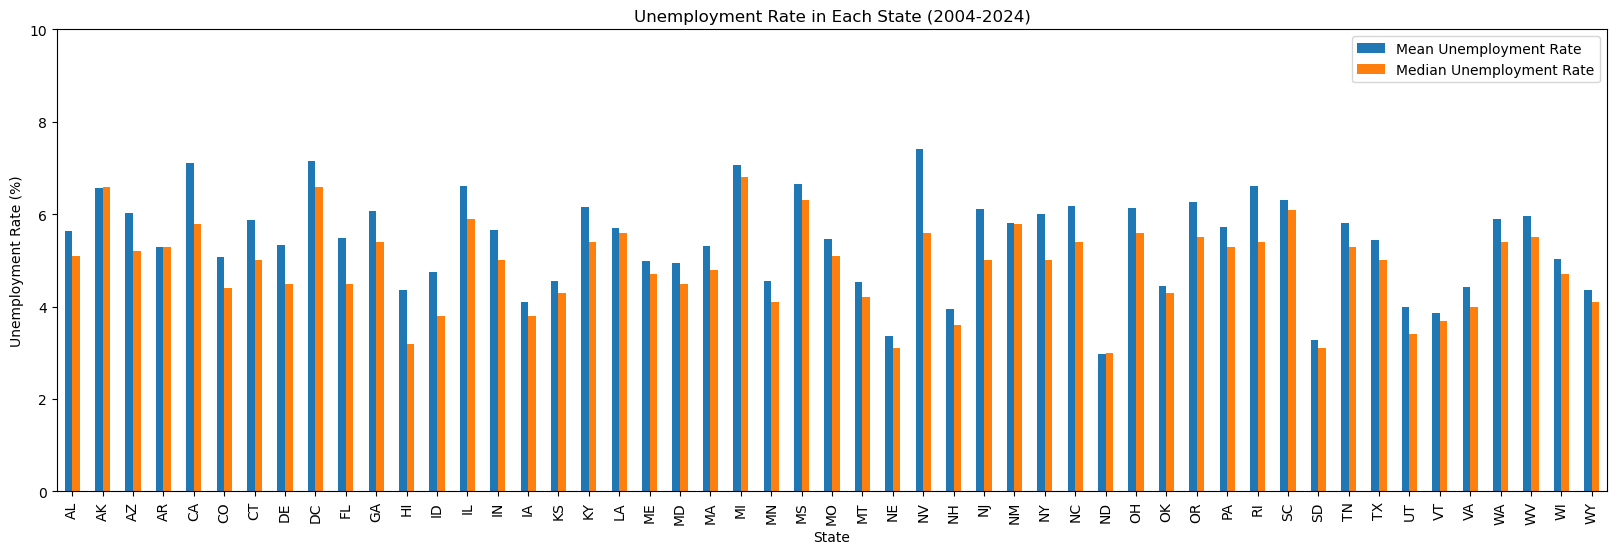

In [11]:
unemployment_plot = states_totals.plot(kind='bar', title='Unemployment Rate in Each State (2004-2024)',
                                       xlabel='State', ylabel='Unemployment Rate (%)', figsize=(20, 6),
                                       ylim=(0, 10));
fig2 = unemployment_plot.get_figure()
fig2.savefig('Visualizations/US_unemployment_per_state.png')